# IMPORTS

## Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

## Loading Data

In [2]:
dfRaw = pd.read_csv('../../01-Data/Results/01-FirstRoundCRISP/dfFeatureEngineering.csv', low_memory=False, parse_dates=['Date'])

# EXPLORATORY DATA ANALYSIS

In [3]:
dfRaw1 = dfRaw.copy()

## Univariate Analysis

### Response Univariate

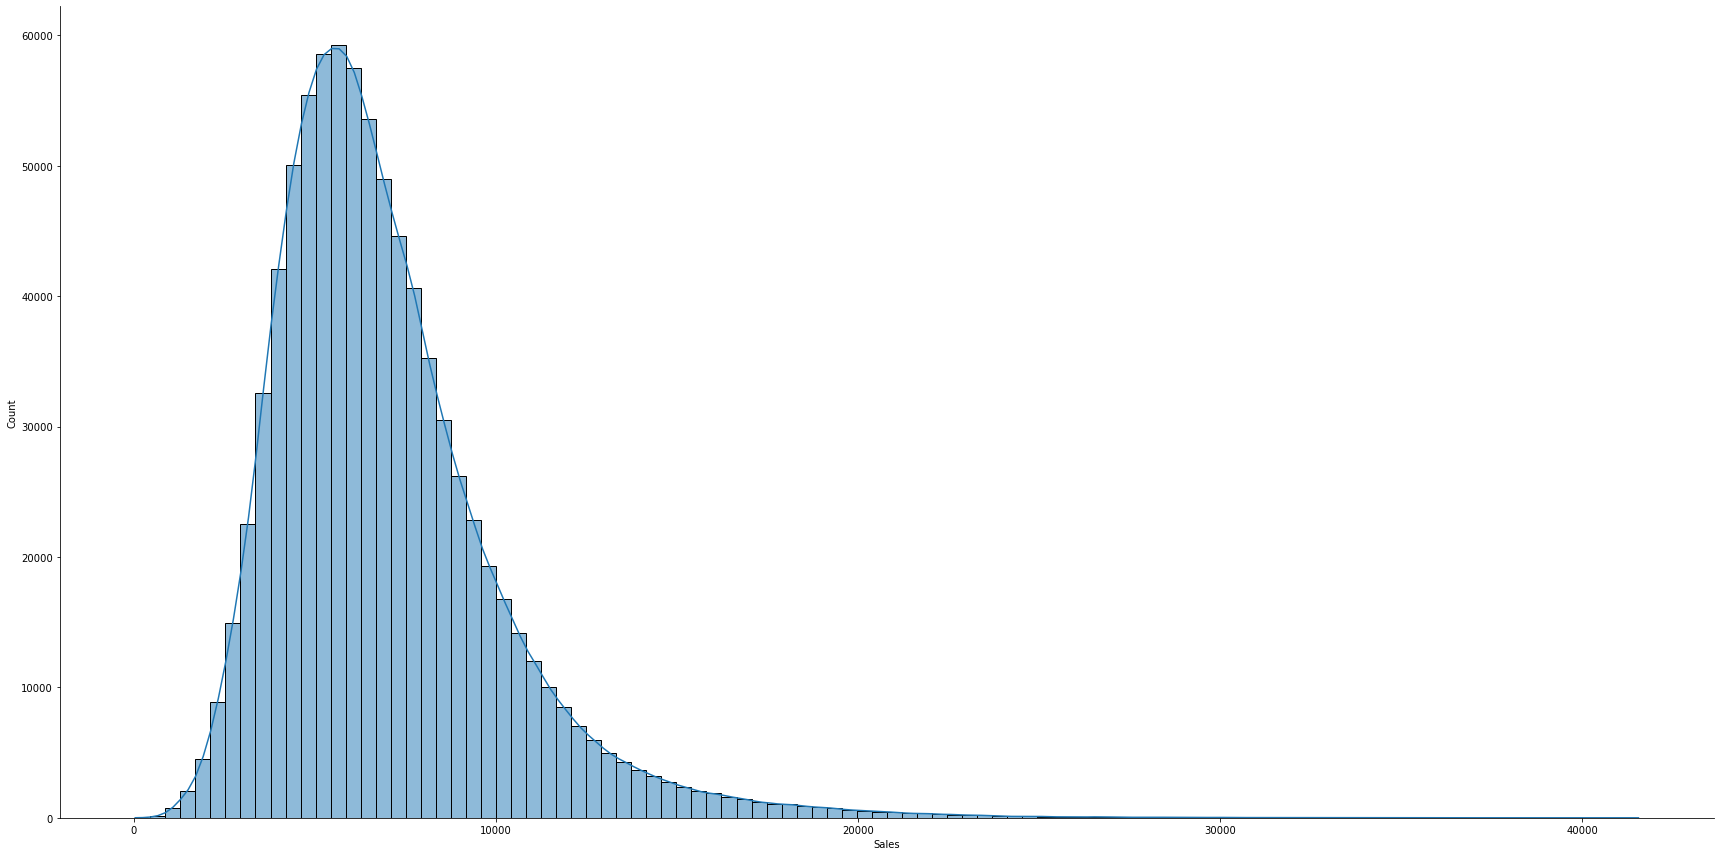

In [4]:
sns.displot(dfRaw1['Sales'], height=12, aspect=2, bins=100, kde=True)

### Numerical Variable

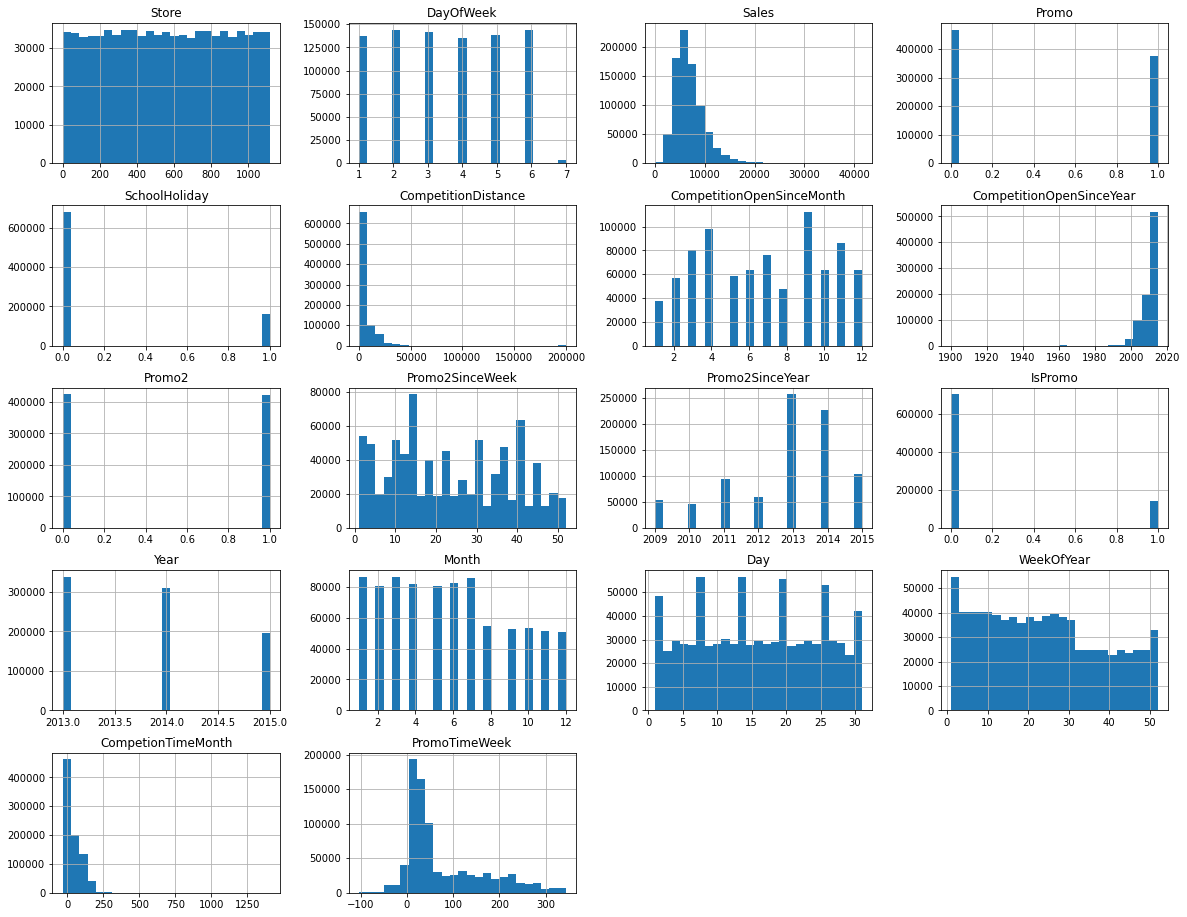

In [5]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])
numAttributes.hist(bins=25, figsize=(20,16))
plt.show()

### Categorical Variable

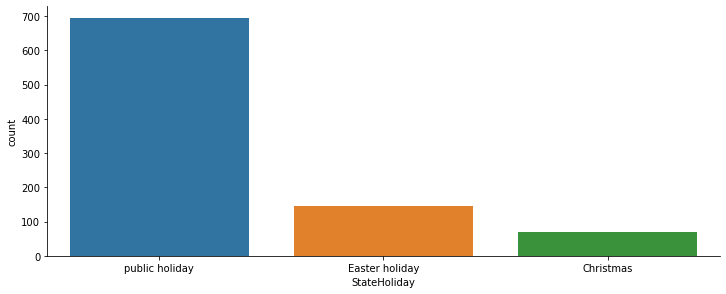

In [6]:
# State Holiday

dfRaw2 = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
sns.catplot(x='StateHoliday', kind='count', data=dfRaw2, height=4, aspect=2.5)
plt.show()

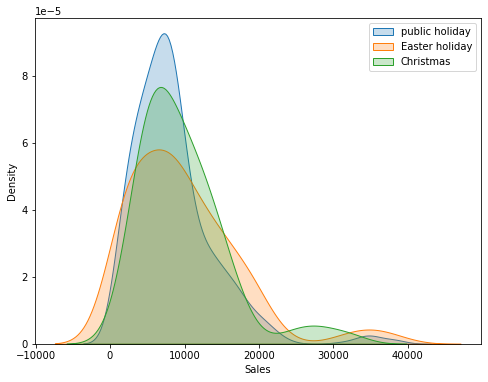

In [7]:
# State Holiday

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'public holiday']['Sales'], label='public holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Easter holiday']['Sales'], label='Easter holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Christmas']['Sales'], label='Christmas', shade=True)
plt.legend()

plt.show()

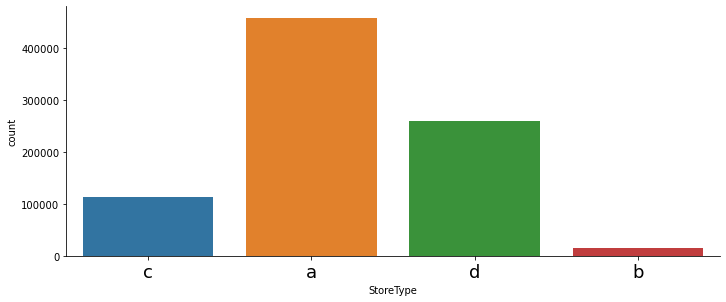

In [8]:
# Store Type

sns.catplot(x='StoreType', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=18)
plt.show()

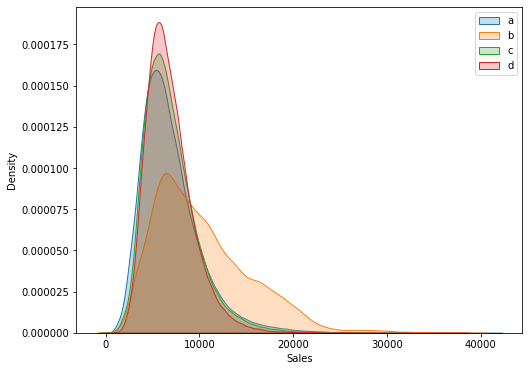

In [9]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

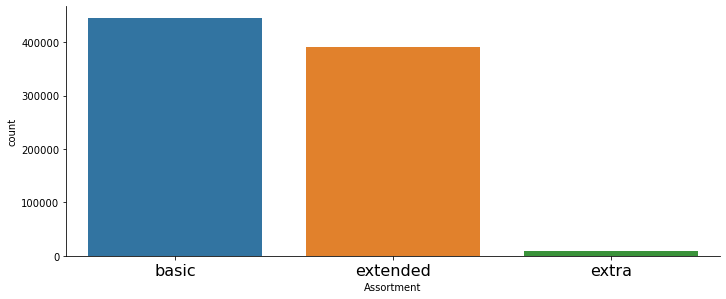

In [10]:
# Store Type

sns.catplot(x='Assortment', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=16)
plt.show()

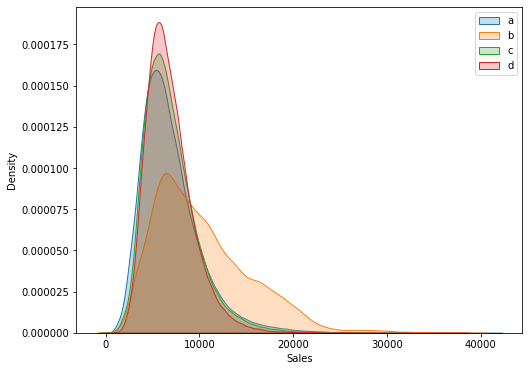

In [11]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

### Bivariate Analysis

#### H1-Stores with larger assortment should sell more
**FALSE** Stores with larger assortment sell **LESS**

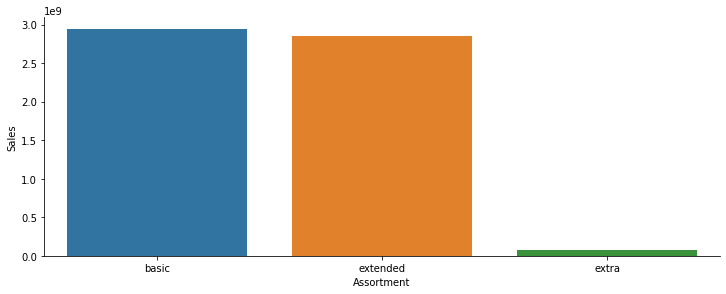

<Figure size 1152x432 with 0 Axes>

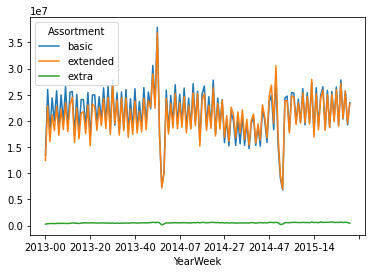

<Figure size 1152x432 with 0 Axes>

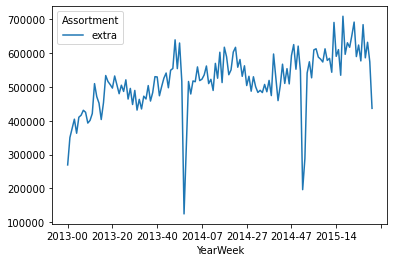

In [31]:
aux1 = dfRaw1[['Assortment', 'Sales']].groupby('Assortment').sum().reset_index()
sns.catplot(x='Assortment', y='Sales', data=aux1, kind='bar', height=4, aspect=2.5);
plt.show()


aux2 = dfRaw1[['YearWeek','Assortment', 'Sales']].groupby(['YearWeek', 'Assortment']).sum().reset_index()
aux2.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()

aux3 = aux2[aux2['Assortment'] == 'extra']
aux3.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()

#### H2-Stores with closer competitors should sell less
**FALSE** Stores with closer competitors sell **MORE**

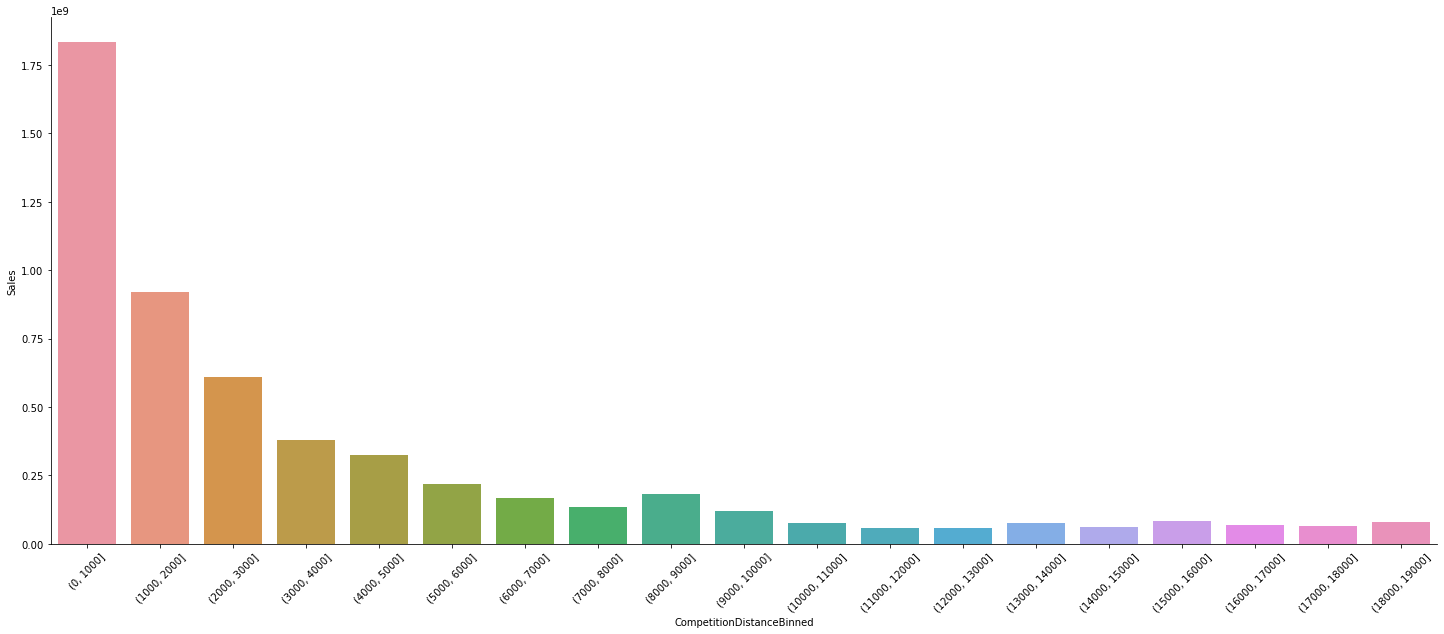

In [20]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()
bins = list(np.arange(0, 20000, 1000))
aux1['CompetitionDistanceBinned'] = pd.cut(aux1['CompetitionDistance'], bins=bins)
aux2 = aux1[['CompetitionDistanceBinned', 'Sales']].groupby('CompetitionDistanceBinned').sum().reset_index()
sns.catplot(x='CompetitionDistanceBinned', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=45)
plt.show()

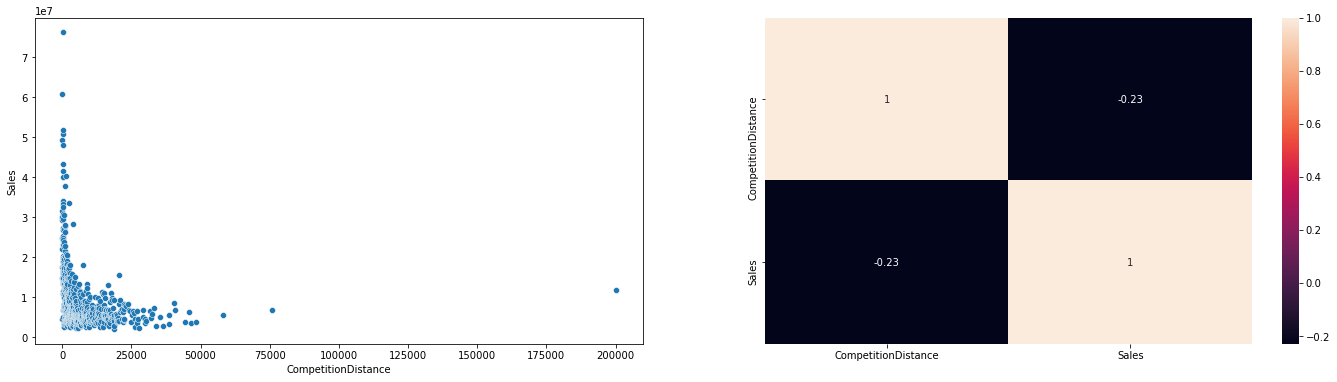

In [43]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetitionDistance', y='Sales', data=aux1)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H3-Stores with longer competitors should sell more
**FALSE** Stores with longer competitors sell **LESS**

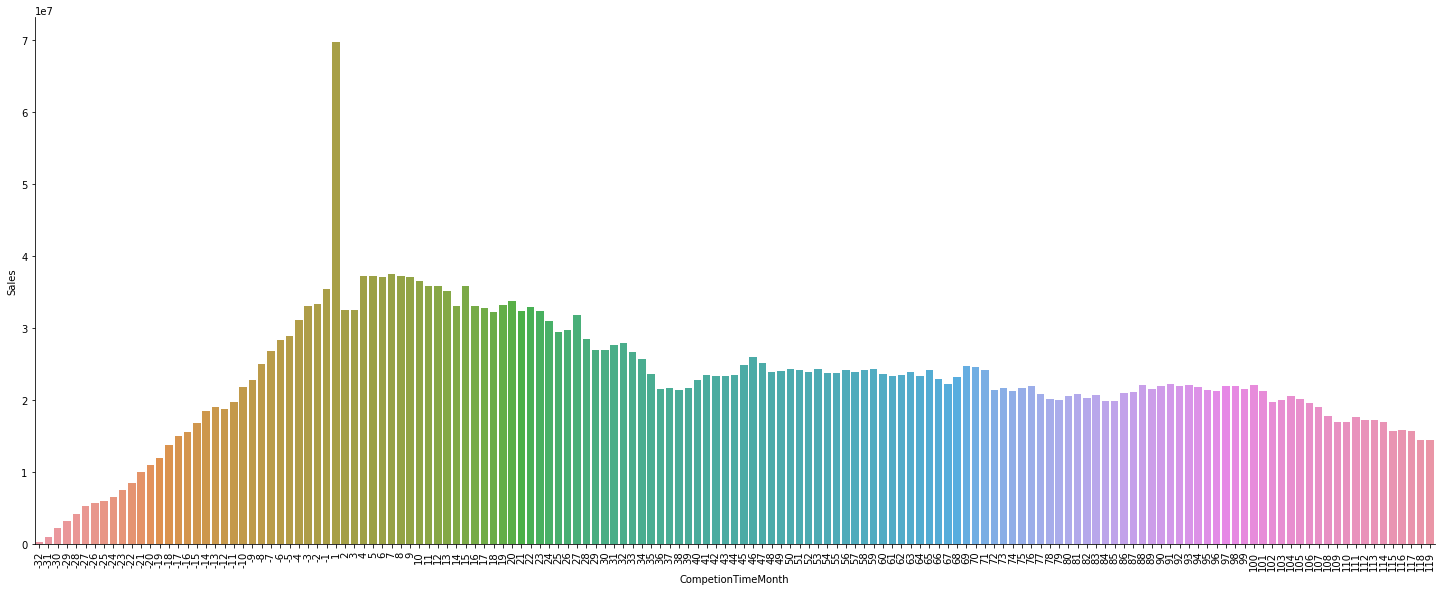

In [54]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]
sns.catplot(x='CompetionTimeMonth', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

In [44]:
dfRaw1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'IsPromo', 'Year', 'Month', 'Day',
       'WeekOfYear', 'YearWeek', 'CompetionSinse', 'CompetionTimeMonth',
       'PromoSince', 'PromoTimeWeek'],
      dtype='object')

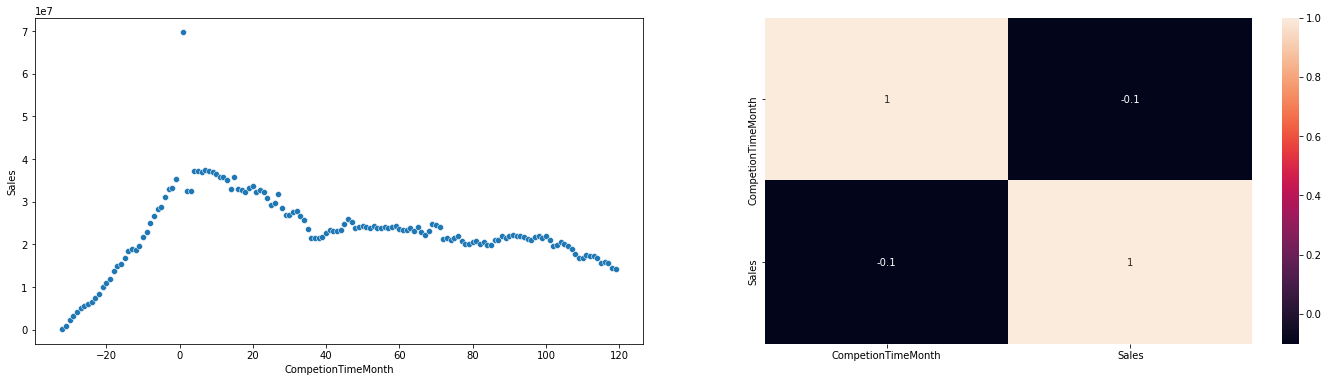

In [56]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetionTimeMonth', y='Sales', data=aux2)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()